In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
stock_data = pd.read_csv(r"NSE-TATAGLOBAL11.csv")


In [4]:
stock_data.head(20)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


In [5]:
stock_data.tail(20)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1215,2013-11-05,168.50,169.80,165.90,167.80,167.60,1762917.0,2960.86
1216,2013-11-03,168.00,170.00,167.25,169.50,169.50,512878.0,868.66
1217,2013-11-01,164.00,169.90,161.55,168.30,167.70,3726470.0,6227.17
1218,2013-10-31,165.00,167.10,163.10,164.10,164.00,3033400.0,4991.85
1219,2013-10-30,163.00,166.00,162.65,165.30,165.00,1918758.0,3158.04
1220,2013-10-29,163.30,164.20,160.25,162.25,162.40,2067392.0,3350.14
1221,2013-10-28,164.00,166.25,162.30,163.10,163.25,1058274.0,1733.67
1222,2013-10-25,166.20,168.40,163.05,163.45,163.85,4412267.0,7337.93
1223,2013-10-24,159.00,166.40,158.00,165.75,165.45,4943284.0,8096.77
1224,2013-10-23,162.10,162.60,157.00,158.90,158.75,1228667.0,1950.57


In [6]:
# Feature selection
X = stock_data[['Open', 'High', 'Low', 'Last']]  # Features
y = stock_data['Close']  # Target variable


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
print("Training Data:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nTesting Data:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Training Data:
X_train shape: (864, 4)
y_train shape: (864,)

Testing Data:
X_test shape: (371, 4)
y_test shape: (371,)


In [9]:
# Creating a Linear Regression model
model = LinearRegression()


In [10]:
 #Training the model
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Making predictions
y_pred = model.predict(X_test)



print("Predicted Close Prices:")
print(y_pred)


Predicted Close Prices:
[125.20831881 119.52981143 131.59752636 283.91331003 309.40294705
 128.22337659 166.86966439 169.08090741 142.86825148 172.65576131
 157.26225471 190.92920914 115.72503295 139.95557181 137.3804712
 131.7114234  121.58372919 291.15700559 152.58415044 150.79742692
 151.45201486 149.46734642 150.24455521 275.08560184 286.31231788
 140.31479425 236.09742057 153.52835933 155.75654702 120.9155699
 119.54721461 118.57367998 145.83530361 137.67253647 118.91192796
 250.99583343 163.68767207 291.06894444 130.7269877  157.44189581
 228.18634901 160.77034382 146.922804   133.7006798  174.55267573
 287.19059022 122.06945013 269.7525834  165.52696982 246.27771259
 146.57342469 134.23977435 210.2218823  151.13107504 149.76891293
 147.00112959 150.87364054 117.96371916 277.53402416 156.37215449
 247.02845494 144.78200222 153.04275993 139.59956196 127.83736239
 198.63377274 138.72696056 157.24406239 159.11541358 275.78051356
 272.49246841 274.697406   152.8084797  131.29796233 1

In [12]:
# Extracting dates for the test set
test_dates = stock_data.loc[X_test.index, 'Date'].values

# Creating a DataFrame to store date, actual close price, and predicted close price
predictions_df = pd.DataFrame({'Date': test_dates, 'Actual Close Price': y_test.values, 'Predicted Close Price': y_pred})

# Printing the DataFrame
print(predictions_df.head(20))  # Printing the first 3 rows

          Date  Actual Close Price  Predicted Close Price
0   2015-09-18              125.45             125.208319
1   2016-06-02              119.25             119.529811
2   2016-07-21              131.80             131.597526
3   2018-04-24              283.15             283.913310
4   2018-01-22              308.85             309.402947
5   2017-01-25              128.35             128.223377
6   2017-07-10              166.55             166.869664
7   2014-09-19              168.60             169.080907
8   2017-02-06              142.75             142.868251
9   2014-06-30              172.75             172.655761
10  2014-01-08              157.10             157.262255
11  2017-08-29              190.35             190.929209
12  2015-08-24              114.85             115.725033
13  2014-02-28              139.70             139.955572
14  2017-02-02              137.65             137.380471
15  2016-11-03              131.35             131.711423
16  2016-04-26

In [13]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.15659779604117907


In [14]:
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.3957243940436059


In [15]:
def forecast_next_30_days(last_week_data):
    # Assuming last_week_data contains the data for the last 30 days
    X_train = last_week_data[['Open','High','Low','Last']]  # Independent variables
    y_train = last_week_data['Close']  # Dependent variable


    # Example data for the next 30 days (replace with your own data)
    X_forecast = np.random.rand(30, 4)  # Independent variables for the next 7 days

    # Predict the values for the next 30 days
    y_forecast = model.predict(X_forecast)

    return y_forecast

# Example usage: assuming you have the last 30 days of data in a separate dataframe called 'last_week_data'
last_week_data = pd.DataFrame({
    'Open': np.random.rand(30),
    'High': np.random.rand(30),
    'Low' : np.random.rand(30),
    'Last': np.random.rand(30),
    'Close':np.random.rand(30)
})

# Get the forecasted values for the next 30 days
forecasted_values = forecast_next_30_days(last_week_data)

# Print the forecasted values for the next 30 days
print("Forecasted values for the next 30 days:", forecasted_values)

Forecasted values for the next 30 days: [0.39860333 0.76013439 0.33502535 0.39240112 0.21965756 0.79983736
 0.83904251 0.73212055 0.84321943 0.46262011 0.37931863 0.2015526
 0.41138774 0.31777565 0.60043084 0.2592361  0.64108549 0.66139056
 0.16689168 0.14056056 0.40340304 0.72772737 0.05858778 0.60147144
 0.4272538  0.5605102  0.15529176 0.52123636 0.46684848 0.81456091]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
import matplotlib.pyplot as plt


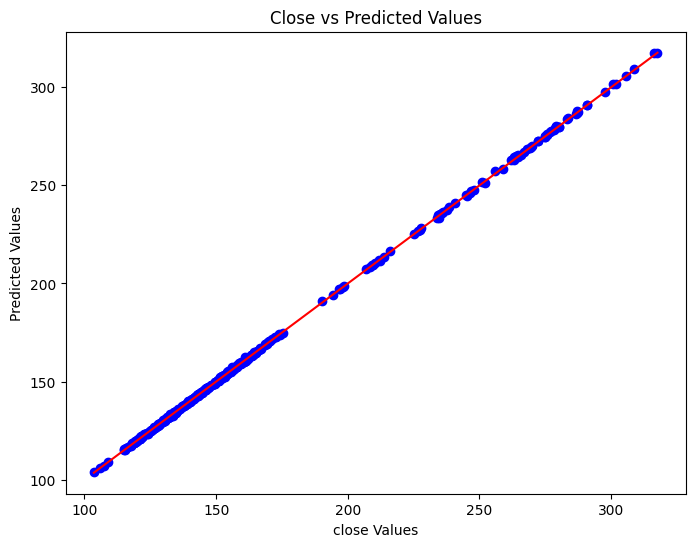

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('Close vs Predicted Values')
plt.xlabel('close Values')
plt.ylabel('Predicted Values')
plt.show()